In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the dataset (correcting the extra quotation mark at the end)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values again
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


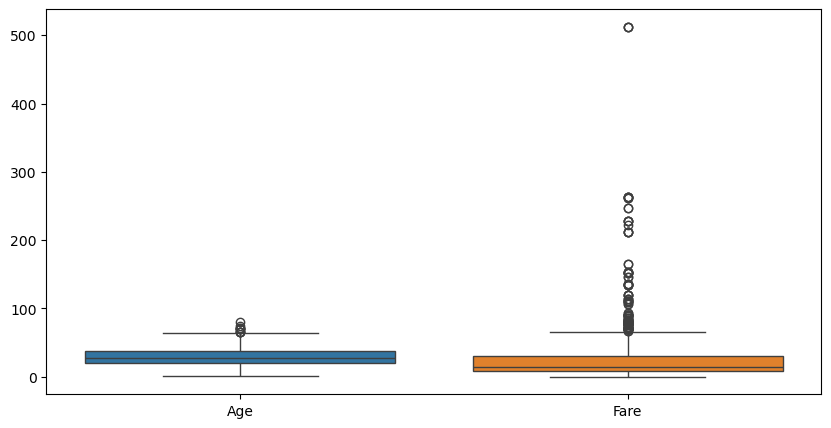

In [15]:
# Boxplots for detecting outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.show()


In [18]:
# Function to cap outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply outlier treatment
cap_outliers(df, 'Age')
cap_outliers(df, 'Fare')


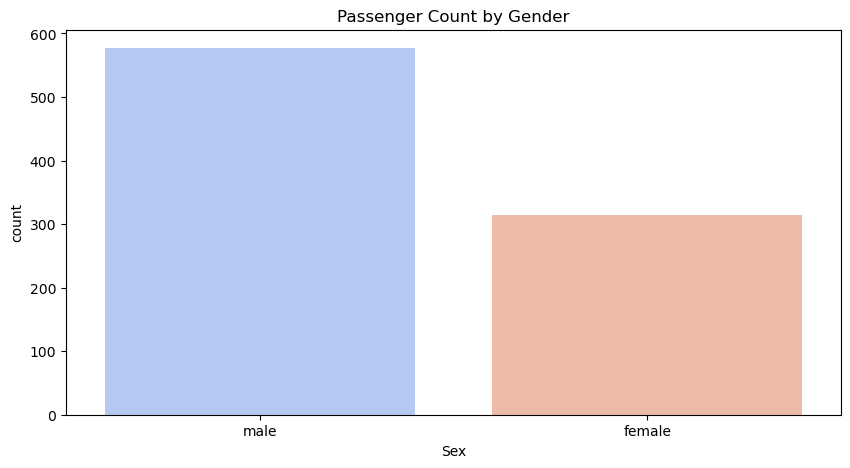

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=df, hue='Sex', palette='coolwarm', legend=False)
plt.title("Passenger Count by Gender")
plt.show()


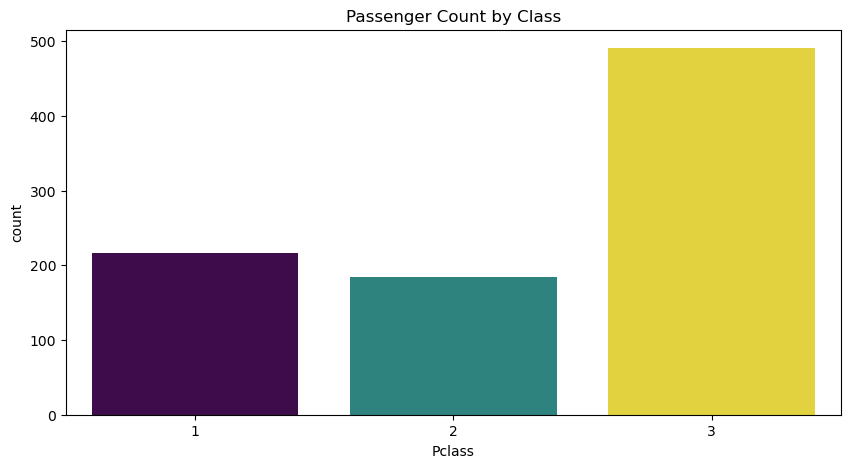

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=df, hue='Pclass', palette='viridis', legend=False)
plt.title("Passenger Count by Class")
plt.show()


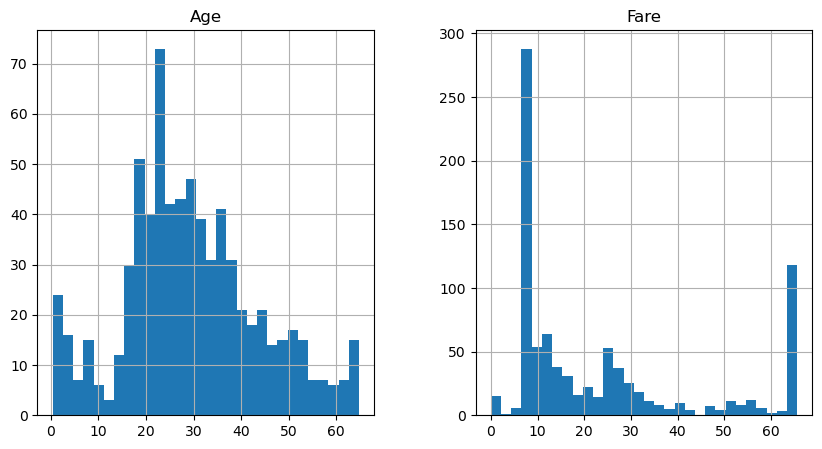

In [24]:
df[['Age', 'Fare']].hist(figsize=(10,5), bins=30)
plt.show()


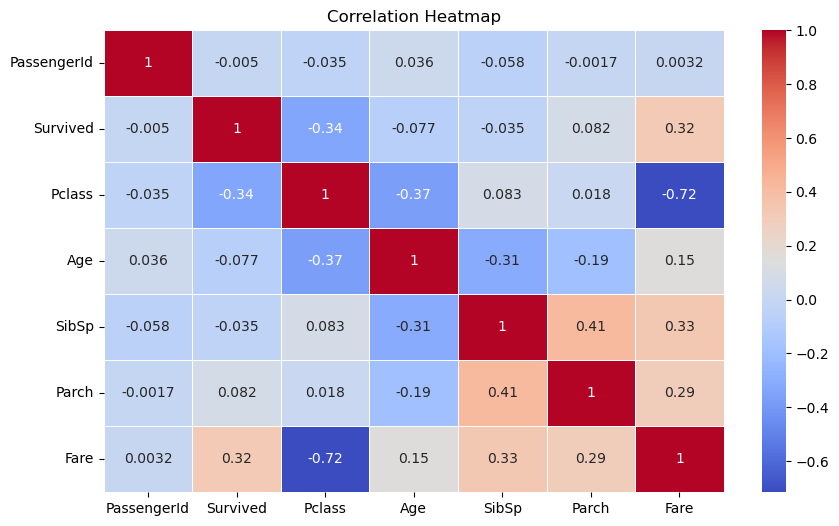

In [28]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()
